In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import sys
import matplotlib.pyplot as plt

sys.path.append('../helpers')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.labelsize'] = 18

import introduction as intro

# Introduction

Supervised Machine Learning tasks ask to estimate the relationship between a set of inputs and an output, after seeing many examples of inputs-output pairs.
We call **regression** the task of estimating the relation between inputs and a continuous numerical output, and **classification** the task of estimating the relation between inputs and a categorical output.

For example, predicting the price of a house given some of its characteristics - square meters, number of bedrooms, neighbourhood, age, etc. - is a *regression* problem, because the output (also called the label, or the dependent variable) is a number: the price.
Estimating the probability that a patient will develop diabetis in the next five years, given the patient data - age, weight, whether he smokes, etc. - is also a regression task, because the output is a probability, i.e., a number.

On the other hand, determining whether a picture depicts a dog, a rabbit, or a kangaroo is a classification task, because the label can only be one of a discrete set of three elements: "dog" or "rabbit", or "kangaroo".
Analogously, predicting whether a company will go bankrupt in the next year by looking at some of their financial indicators is also a classification problem, because the expected output is either "Yes" or "No".

Sometimes the difference between a regression and a classification task is not clear from the beginning, especially because classification tasks can be interpreted as stimating the *probability* that an element has a given label (and probabilities are numbers).
The theory and tools we use for one task vs. the other, however, are very different and so it's a good idea to think carefully before starting if the end result of our predictions should be a number or a discrete label.

In the first notebooks of this course, we are going to see general concepts such as the bias-variance trade-off, how to train a model, how to estimate its quality, etc.
To keep things simple, I will use the regression setting in the examples.

Let's consider the following standard case:
we have $n \in \mathbb{N}$ data points in our data set and each of them has $p \in \mathbb{N}$ **features**.
We can write our data points as $\mathcal{X} = (X_1, \ldots, X_n)^\top$ and a particular data point $X_i$ as $X_i = (x_{i1}, \ldots, x_{ip})$.
In the general case, we can let every $x_{ij}$ be a real number: $x_{ij} \in \mathbb{R}$.
Note that $\mathcal{X}$ is then a $p \times n$ matrix.

What's more, in supervised learning problems, we associate an output $Y_i$ to each input data point $X_i$.
In regression problems, we can again assume that $Y_i \in \mathbb{R}$ for all data points and we can denote as $\mathcal{Y} = (Y_1, \ldots, Y_n)^\top$ the vector of all outputs.
The outputs are also called **labels**, hence we talk about labelled data.

### Relation between inputs and outputs

When approaching a learning task, we assume that there is a certain *hidden* relation between the inputs and the outputs.
This relation is unknown to us and we want to **estimate** it.
In mathematical terms, we assume that there is a function that links a given data point with its corresponding label.
This is an $f : \mathbb{R}^p \to \mathbb{R}$ such that, given a data point $X$ and the corresponding label $Y$:

$$Y = f(X) + \varepsilon$$

Here $\varepsilon$ indicates is an **error term** (also called *noise*), which is a random variable that we assume to have two important characteristics:

* it is independent from $X$;
* it has zero mean: $\mathbb{E}[\varepsilon] = 0$.

This is a reasonable assumption if we think of $\varepsilon$ as the error introduced by limiting our inputs to $p$ features.
Real-world relations are complex and depend on a huge amount of factors, some of which are not deterministic.
We simplify our job by only measuring some of the inputs which are relevant to the task we are facing.
This inevitably introduces some error, that we have represented here as $\varepsilon$.

The condition that $\varepsilon$ is independent from $X$ means that properties of $Y$ which can be inferred from the $p$ features we are considering are not accounted by $\varepsilon$.
The condition that $\mathbb{E}[\varepsilon] = 0$ means that, over (infinitely) many observations, the effects of the error truly are unpredictable; for example, it doesn't consistently result in overestimation, nor underestimation.

We can make this clearer with an example.
Imagine we want to describe the mark obtained in a class as a function of some inputs.
We use the following features: share of class attendance, number of hours of study, student's GPA, number of weekends spent partying, availability of a quiet room to study.
Intuitively, there is a strong relationship between these factors and the expected mark a student will get.
But these features are not enough to explain accurately each student's mark.
For example, a student might get a cold the day of the exam and, therefore, perform poorly.
This is the type of uncertainty which is contained in the error term $\varepsilon$.
Note that, in this particular example:

* The error is independent from the other variables: we cannot guess if a student will have a bad exam day (e.g., a cold) using the other input features.
* The error has zero mean: on average, given a very large number of observations, there will be as many students with unlucky days as with lucky days (for example, just opened the book at a random page ten minutes before the exam, and got a question on that very topic).
* We could reduce this error by increasing the number of features. Imagine, for example, to add the feature "body temperature on the exam day".

### Finding a good estimator

Our goal is to estimate the relation $f$.
In other words, we would like to find an **estimator** $\hat{f}$ and the corresponding **prediction** $\hat{Y} = \hat{f}(X)$, which accurately estimates the true function $f$ and, respectively, the true output $Y$.

But how can we measure the accuracy of the prediction $\hat{Y}$?
A popular way to do so is to consider the squared difference between the true value $Y$ and the prediction $\hat{Y}$: $(Y - \hat{Y})^2$.
This quantity is called the **squared error**: the lower it is, the higher is the prediction accuracy.

There are many reasons why the squared error is a popular measure.
The square term penalises more predictions which are farther away from the true value.
It also disregards the sign of the error, which is good because we often don't care if we are under- or over-estimating, just by how much.
You might also remember from your statistic class that, if $\varepsilon$ is Gaussian, then the square error is related with the maximum log-likelihood estimation.

We can then ask: how accurate do we expect our estimator to be?
In other words, what can we say about the expected value of the squared error?
Let's see:

$$
\begin{align*}
    \mathbb{E}_\varepsilon[(Y - \hat{Y})^2] &= \mathbb{E}[(f(X) + \varepsilon - \hat{f}(X))^2] = \\
    &= \mathbb{E}[(\underbrace{f(X) - \hat{f}(X)}_{\alpha} + \varepsilon)^2] = \\
    &= \mathbb{E}[\alpha^2 + 2\alpha\varepsilon + \varepsilon^2] = \ldots
\end{align*}
$$

Here we are taking the expectation with respect to our random variable $\varepsilon$, the noise.
Notice that the term $\alpha$ is not random, because $f$, $\hat{f}$ and $X$ are all deterministic values in this setting: $f$ is the *true* relationship, $X$ is a given input, and $\hat{f}$ is a given estimator.
The only term affected by uncertainty is the error $\varepsilon$.
Therefore, we can bring $\alpha$ outside the expected value.

$$\ldots = \alpha^2 + 2 \alpha \mathbb{E}[\varepsilon] + \mathbb{E}[\varepsilon^2] = \ldots$$

Then, using the fact that $\mathbb{E}[\varepsilon] = 0$, we obtain:

$$\ldots = \alpha^2 + \mathbb{E}[\varepsilon^2] = \ldots$$

Consider now the variance of $\varepsilon$.
By definition, it is $\text{Var}[\varepsilon] = \mathbb{E}[\varepsilon^2] - (\mathbb{E}[\varepsilon])^2 = \mathbb{E}[\varepsilon^2]$, where again we used the fact that $\mathbb{E}[\varepsilon] = 0$.
So, finally, we can write:

$$\ldots = [f(x) - \hat{f}(X)]^2 + \text{Var}[\varepsilon]$$

We have then decomposed the expected value of the squared error into two parts:

* The first is $[f(x) - \hat{f}(X)]^2$. It is called the **reducible error** because, if we were able to find the perfect estimator ($\hat{f} = f$) this term would disappear.
* The second is $\text{Var}[\varepsilon]$. It is called the **irreducible error** because, even if we were able to find the perfect estimator ($\hat{f} = f$), this term would not be affected: we would have $\hat{Y} = f(X)$, but the true value would be $Y = f(X) + \varepsilon$, and the difference between predicted and true value would be larger, the larger is the variance of the noise.

In fact, the only way for $\mathbb{E}[(Y - \hat{Y})^2]$ to vanish, is that $\text{Var}[\varepsilon] = 0$.
This happens if all our measurements are never affected by any noise or unaccounted features: something that does not happen in the real world!

### Parametric models

In this introduction we are only concerned with **prediction problems**: we want to find a good estimator $\hat{f}$ which yields good predictions $\hat{Y}$ and we want to keep the error as low as possible.
(There are other type of problems — popular, e.g., in economics — when the main focus is in *explaining* and proving *causality* between inputs and outputs, not in predicting future outputs.)

The space of functions $\mathbb{R}^p \to \mathbb{R}$ where we are looking for $\hat{f}$, however, is incredibly large.
Searching for $\hat{f}$ in this space whithout any other constraint would be, therefore, an extremely hard task.
We can reduce the difficulty of this task by imposing a particular shape on $\hat{f}$.

For example, we might want to restrict $\hat{f}$ to be a linear function:

$$\hat{f}(X) = \lambda_0 + \lambda_1 x_1 + \ldots + \lambda_p x_p$$

where the data point is $X = (x_1, \ldots, x_p)$ and $\lambda_0, \ldots, \lambda_p \in \mathbb{R}$ are parameters defining $\hat{f}$.
In this case we are confronted with a much easier task.
Instead of having to find a good function $\mathbb{R}^p \to \mathbb{R}$, we "simply" have to find good values for $\lambda_0, \ldots, \lambda_p$.

The values $\lambda_0, \ldots, \lambda_p$ are called the parameters of the model.
A model which is completely described by a finite set of parameters is therefore called a **parameteric model**.
Parametric models are the most common type of model used for Machine Learning tasks and will be our focus for this course.

To **train** a parametric model means to find the parameters which minimise the error of the estimator.
In the following we explain more precisely what we mean with this statement.

### What is the error of an estimator?

As we have seen before, a popular way to quantify the error of an estimator is using the squared error.
Before, we calculated the expected value of this quantity;
but in real settings, we only have a finite amount of data and no precise statistical model to calculate the expected value.
What we do then, is to calculate the empirical mean of the squared errors, over the data points we have.
This is called the **Mean Squared Error (MSE)**.
Given $n$ data points $X_1, \ldots, X_n$ with their respective labels $Y_1, \ldots, Y_n$, the MSE of an estimator $\hat{f}$ is defined as:

$$\text{MSE}(\hat{f}) = \frac{1}{n} \sum_{i = 1}^n \left(Y_i - \hat{f}(X_i)\right)^2 = \frac{1}{n} \sum_{i = 1}^n \left( Y_i - \hat{Y}_i \right)^2$$

In other words, we are considering an *empirical estimate* over the $n$ points, of the expected value of the squared error.

#### Note: loss functions

Using the squared error as a measure of the *in*accuracy of an estimator is not the only possible choice.
The MSE has properties which might be useful in some contexts but not in others.
In general, what we want to use is a **loss function** $\ell : \mathbb{R}^2 \to \mathbb{R}$ such that, given a label $Y$ and an estimation $\hat{Y}$, provides a value which is large for estimations we consider *bad*, and small for estimations we consider *good*.

The quality of an estimator is then given by the more general formula:
$$\frac{1}{n} \sum_{i = 1}^n \ell(Y_i, \hat{Y}_i)$$
In the case of the MSE, we have $\ell(Y, \hat{Y}) = (Y - \hat{Y})^2$.

In the figures below, we assume that the true label is $Y = 1$, and we plot the loss function as a function of $\hat{Y}$ only.
In other words, we plot $\ell(1, \hat{Y})$.
For the squared loss, this would result in the following chart:

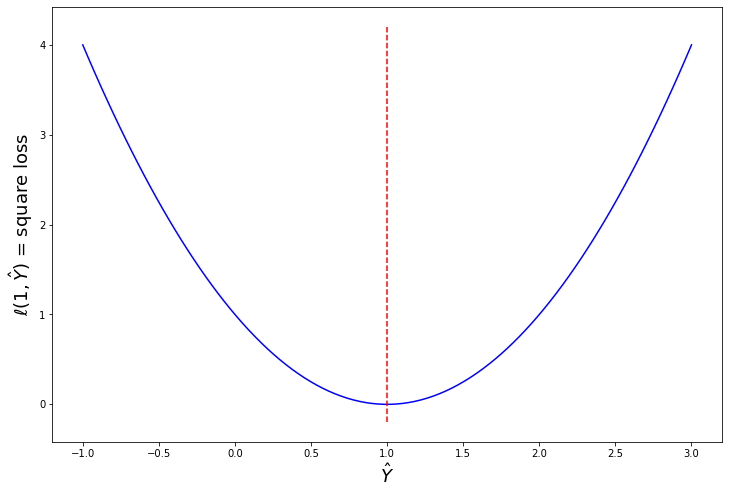

In [15]:
intro.chart_square_loss();

Another loss function, popular in classification problems, is the *binary loss*:
$$\ell(Y, \hat{Y}) = \begin{cases} 0 & \text{if } Y = \hat{Y} \\ 1 & \text{if } Y \neq \hat{Y} \end{cases}$$
which gives a unit penalty to wrong predictions, and no penalty to correct ones.

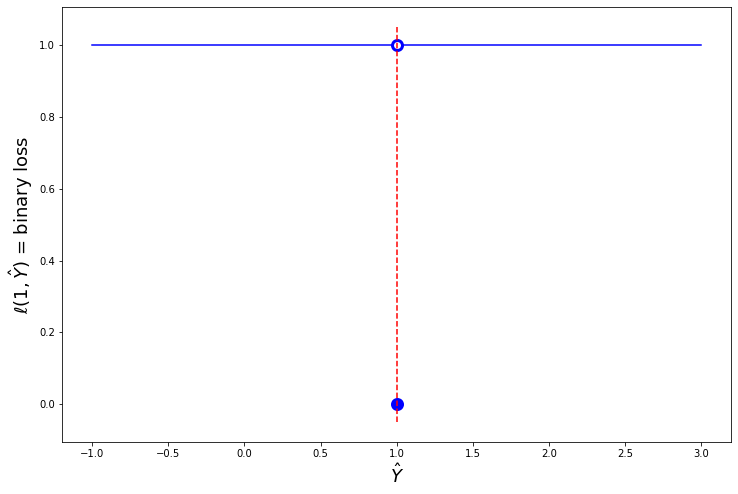

In [16]:
intro.chart_binary_loss();

Another example is the hinge loss, commonly used in Support Vector Machines when $Y \in \{-1,+1\}$:
$$\ell(Y, \hat{Y}) = \max \{ 0, 1 - Y \hat{Y} \}$$

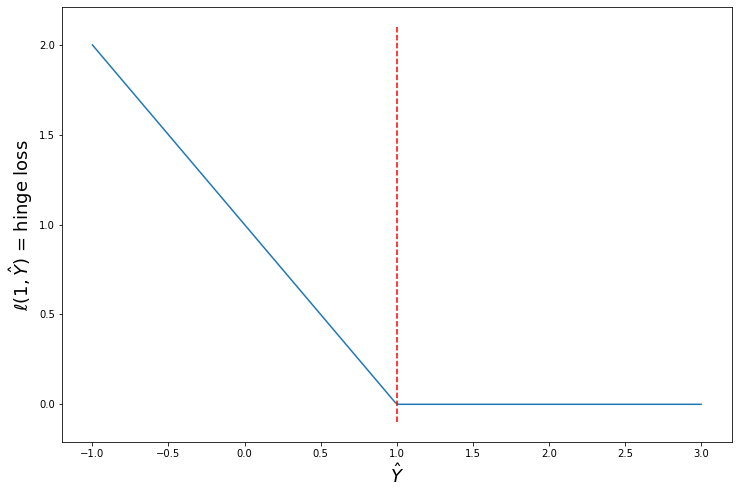

In [17]:
intro.chart_hinge_loss();

### Over *what* should the error be computed?

In the formula given above, $\text{Error} = \frac{1}{n} \sum_{i = 1}^n \ell(Y_i, \hat{Y}_i)$ we are summing over the $n$ data points in our dataset.
Given a dataset which contains both the input features and the labels, we are estimating how good our model is at linking inputs and outputs for the points in the dataset.
Such an evaluation criterion is hardly useful when we care about making predictions.
When predicting, we are interested in the performance the model will show on new, unknown points; not on points for which we already know the label.

Indeed, it would be very easy to obtain a perfect non-parametric model over the labelled dataset: we would just have to memorize all the labels and return the correct one when asked!
For this reason, it is imporant to test the model on a dataset which is separate from the one we use to train it.
A possibility is to divide our data into two parts:

* One is the **training data**.
This is the data used to train the model.
Note that the error $\frac{1}{n} \sum_{i = 1}^n \ell(Y_i, \hat{Y}_i)$ depends on the estimator $\hat{f}$, and the concrete estimator $\hat{f}$ depends on its parameters (say, $\lambda_1, \ldots, \lambda_k$).
Therefore, we can get a better or worse error if we change the parameters of the model.
This suggests that we should look around in the *parameter space* and try to find those parameters that give the smallest possible error over the training data.
This process is called **training** the model.
* The other one is the **test data**.
This data is not used during model training.
Once the model is trained and the parameters have been chosen, we compute the error of the model over the test data.
We will use this error as a measure of accuracy for the model.
The accuracy can then be used, for example, to compare two alternative models and choose which one we think will give better predictions.

There are many ways to create the training set and the test set.
We could just split out dataset into two (e.g., 75% for training, 25% for testing), or we could use more advanced techniques such as *the bootstrap* or *cross-validation*.
We will cover this topic in a few classes.
What matters is that we want to achieve different objectives with the two datasets we create.
We want to find the best parameter for the model using the training data; and we want to provide a measure of the accuracy of the model using the test data.

It is important to notice that, because we have two sets of data (training and test), we can compute two types of error.
For example, if we use the MSE as our loss function, we can compute it both on the training data and on the test data.
The MSE on the training data (the **training MSE**) is used less commonly because, as we said, we don't care too much about what our model does on the training set.
Its main use is to guide our search towards a good parameter combination, but once we decide we have good parameters, we don't care about the training MSE any more.

The MSE on the test data (the **test MSE**) is what we care more about.
This is because we assume that the MSE over the test data is a good approximation of the error that the model would show when presented with new, previously unseen data.
In other words, we use the test MSE to estimate how the model would behave "in the wild", in a real prediction application.
Is it a good idea to use the test MSE as an estimate of the "true" MSE of the model?
We will discuss this idea in more detail in a few classes.

### How to train a model?

We will now write down in mathematical terms the problem of training a model, as a minimisation problem.
To be more precise, let's write our estimator as depending both on the parameters and the inputs.
It is customary in the statistical learning community to call this function, when it still depends on the parameters, the **hypothesis function**.
We will conform to this custom and denote it as $h(\Lambda, X)$.
Here $\Lambda \in \mathbb{R}^k$ is a vector of $k$ parameters, which we can assume are real numbers.
For example, in the case of linear regression we have seen above, we would have $k = p+1$ and $\Lambda = (\lambda_0, \ldots, \lambda_p)$.
Once the parameters of the hypothesis function have been determined and fixed, we indicate it with $\hat{f}$ and call it "the predictor".
Let $X_1, \ldots, X_m$ be the data points in the training set and $X_{m+1}, \ldots, X_n$ those in the test set.
To **train a model** based on the hypothesis function $h$, then, means to solve the following problem:

$$\min_{\Lambda \in \mathbb{R}^k} \quad \frac{1}{m} \sum_{i=1}^m \ell(Y_i,h(\Lambda, X_i))$$

We cannot always hope to obtain a global minimiser to this problem.
We often would have to impose some regularity hypothesis on $\ell$ to be able to do so.
But in any case, during the training phase we aim at finding parameters $\Lambda^*$ which give a low enough value for the error.
Once such a $\Lambda^*$ has been found, we let $\hat{f}(X) = h(\Lambda^*, X)$ and we use this $\hat{f}$ as our predictor.
We can then proceed, for example, by calculating the test MSE of $\hat{f}$:

$$\frac{1}{n-m} \sum_{i=m+1}^n \big( f(X_i) - \hat{f}(X_i) \big)^2$$

In the next class we will see what are popular algorithms to find either the global minimiser of the problem above or, if there is no guarantee to find the global minimiser, at least some good local optimum.

### The bias-variance trade-off

When training the model over the training set, we need to take particular care of the following problem.
Our predictor $\hat{f}$ depends on the parameters $\Lambda^*$ we found solving the training problem.
The result of the training problem, in turn, depend on which points ended up in the traning set.
Therefore, if we split our data twice into training and test sets, and we do this at random, we will likely see two different training sets.
These two training sets will result into two different training problems, which will give two different parameters $\Lambda^*$, finally giving two different predictors $\hat{f}$.

We can conclude that the predictor $\hat{f}$ is affected by the randomness we use when select the data points that form the training set.
In other words, the composition of the traning set is a random variable and, therefore, $\hat{f}$ is also a random variable because it depends on the training set used.

When we evaluate the error as $\mathbb{E}[(Y - \hat{Y})^2]$ as we have done before, then, we now have two sources of randomness.
The error $\varepsilon$, as we had before, but also the choice of training set.

We will now show that the following identity holds:
$$\mathbb{E}_{\text{Training Set}}[(Y - \hat{Y})^2] = \text{Var}[\hat{Y}] + \text{Bias}^2[\hat{Y}] + \text{Var}[\varepsilon]$$
where:

* Recall that the definition of **bias** is: $\text{Bias}[\hat{Y}] = \mathbb{E}[\hat{Y}] - Y$.
* Notice that the expected value is taken over possible choices of the training set.
  Because the parameters of the model are decided during training, they depend on the data points which happen to end up in the training set.
  Therefore, different training sets give different models and different predictors $\hat{f}$.

The second point implies that training a model twice, on two different training sets, can produce different predictors, even though the data points in the overall data set are fixed (there is no effect of $\varepsilon$ now).
This is in contrast with the fact that there is only one "true" relationship $f$ between input and output: how can we have many predictors $\hat{f}$ that change as soon as we change the training set?
Are they all going to be similar to the true $f$?
What we want, therefore, is that when we train our model, the resulting $\hat{f}$ is **robust** with respect to the training set used.
Changing the points in the training set should not change by much the resulting $\hat{f}$.
Indeed, $\hat{f}$ would be a poor predictor of $f$ if it changed every time a different training set is used.
How could two such $\hat{f}$ both be "similar" to the true $f$ if they were wildly different from each other, just by choosing different data for training?

Let's see, then, where the formula above comes from:

$$
\newcommand{\Exp}[1]{\mathbb{E}\left[#1\right]}
\newcommand{\hY}{\hat{Y}}
\newcommand{\EhY}{\Exp{\hY}}
\newcommand{\f}{f(X)}
\newcommand{\e}{\varepsilon}
\newcommand{\u}[1]{\underline{#1}}
\newcommand{\uu}[1]{\u{\u{#1}}}
\begin{align}
    \Exp{(Y - \hY)^2} &= \Exp{(Y - \f + \f - \hY)^2} = \\
    &= \Exp{(Y - \f)^2} + 2 \Exp{(Y - \f)(\f - \hY)} + \Exp{(\f - \hY)^2} = \\
    &= \Exp{(\f + \e - \f)^2} + 2 \Exp{Y \hY - Y \f - \hY \f + \f^2} + \Exp{(\f - \hY)^2}
\end{align}
$$

Now, the first term is $\Exp{\e^2}$ which, as we already know, is $\text{Var}[\e]$.
Then we are left to find the terms with the variance and bias-square of $\hY$.
They will both be in the third term, because the second term is actually null.
To see this, consider:

$$
\begin{align}
    2 \Exp{Y \hY - Y \f - \hY \f + \f^2} &= 2 \Exp{\f \hY + \e \hY - \f^2 - \e \f - \hY \f + \f^2} = \\
    &= 2\Exp{\e \hY - \e \f} = 2\Exp{\e \hY} - 2\Exp{\e \f} = \\
    &= 2\Exp{\e \hY} - \f \Exp{\e} = 2\Exp{\e \hY} = \\
    &= 2 \Exp{\e} \Exp{\hY} = 0
\end{align}
$$

In the passages above, we can take $f(X)$ outside the expected value because it does not depend on the train-test split.
Analogously, we can write $\Exp{\e \hY} = \Exp{\e} \Exp{\hY}$ because $\e$ and $\hY$ are independent, and they are independent because the randomness of $\hY$ (once the data-set is fixed) only comes from the train-test split, not from the random noise.

Our final task is then to prove that $\Exp{(\f - \hY)^2} = \text{Var}[\hY] + \text{Bias}^2[\hY]$:

$$
\begin{align}
    \Exp{(\f - \hY)^2} &= \Exp{(\f - \EhY + \EhY - \hY)^2} = \\
    &= \Exp{(\f - \EhY)^2} + 2 \Exp{(\f - \EhY) (\EhY - \hY)} + \Exp{(\hY - \EhY)^2} \\
    &=\left(\f - \EhY\right)^2 + 2 \Exp{(\f - \EhY) (\EhY - \hY)} + \Exp{(\hY - \EhY)^2}
\end{align}
$$

By definition, the first term is $\text{Bias}^2[\hY]$ and the last one is $\text{Var}[\hY]$.
Therefore, to conclude the proof, we have to show that the central term is zero:

$$
\begin{align}
    2 \Exp{(\f - \EhY) (\EhY - \hY)} &= 2 \Exp{Y \EhY - \e \EhY - \EhY^2 - \hY Y + \e \hY + \hY \EhY} = \\
    &= 2 \Exp{ Y \EhY - \EhY^2 - \hY Y + \hY \EhY } = \\
    &= 2 \left( Y \EhY - \EhY^2 - Y \EhY + \EhY^2 \right) = 0
\end{align}
$$

Where we used the facts that $\Exp{\e} = 0$, again that $\e$ and $\hY$ are independent, and that the expectation of a number is the number itself --- therefore, e.g., $\Exp{\EhY} = \EhY$.

In fact, the formula $\mathbb{E}[(Y - \hat{Y})^2] = \text{Var}[\hat{Y}] + \text{Bias}^2[\hat{Y}] + \text{Var}[\varepsilon]$ tells us that we can decompose the error as the sum of the variance and the bias squared of the prediction, plus the variance of the error.
We don't have control over this last term (remember it was the *irreducible* error?).
We should, therefore, focus on the first two.
This is because we want to minimise the error, so ideally we would like to train a model which exhibits both low variance and low bias.
What is the interpretation of these two quantities?

* The **variance** measures by how much the estimator $\hat{f}$ varies, when we vary the training set.
If a small variation of the training set (for example, adding one new point) produces a large variation in the optimal parametres of the model, then we say that the model exhibits high variance.
On the other hand, if small variations in the training set only produce small variations in $\Lambda^*$, we say that the model exhibits low variance.
* The **bias** measures by how much our estimate differs from the real value.
A model that fits all points in the training set perfectly will show no bias.
Sometimes the bias is introduced by the parametrisation of $f$: if we use the wrong parametric model, no matter how much we train it, we are always going to have some error.
Think, for example, if we were to fit with data with an underlying quadratic distribution (a parabola) using a straight line.
Because the "shapes" of $f$ and $\hat{f}$ differ, we will never be able to intercept well the points with our straight line.
Such a model will show a high bias.

The bad news for us is that models which tend to have low variance exhibit high bias, and the other way around.
This phoenomenon is known as the **bias-variance trade-off** and makes it difficult to minimise both quantities at the same time.
As an example of the interactions between bias and variance, consider the following: we want to train a model on a dataset of 5 points with one input feature ($x$) and one output feature ($y$).

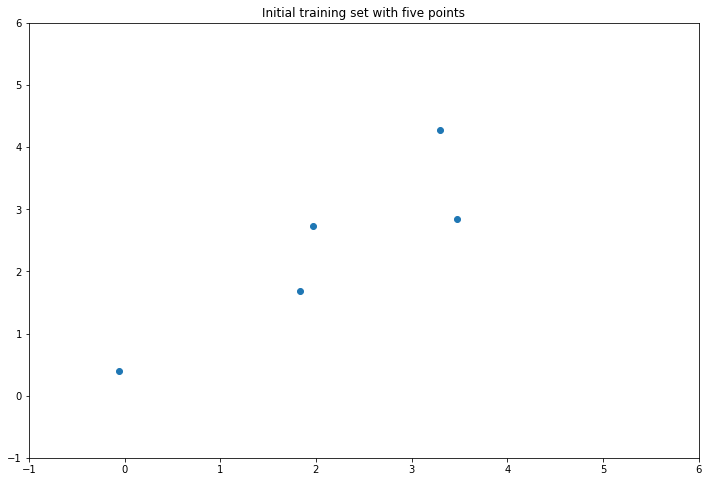

In [18]:
intro.bv_chart_five_pts();

We will fit this point first with a linear regression model and then with a polynomial one.
Since we have five points, any polynomial of degree 4 will produce a perfect fit for the points.
The linear model, instead, will probably miss some (or all) of the points.
This means that the linear model will have some bias, while the polynomial one will have none.

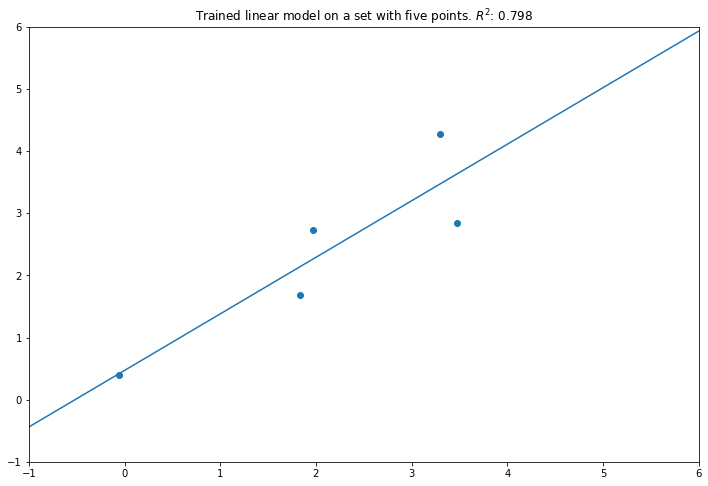

In [19]:
intro.bv_chart_linear();

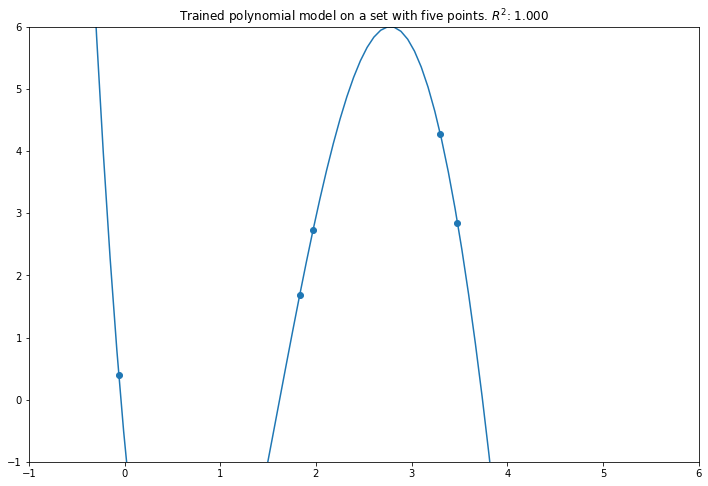

In [20]:
intro.bv_chart_poly();

We can now add a new point and see what happens.
A model with low variance would show a new trend line quite similar to the previous one.
A model with high variance would show a dramatically different trend line.

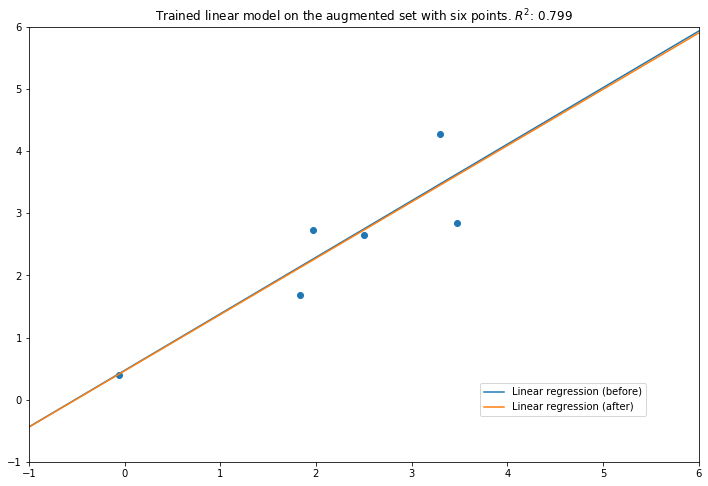

In [21]:
intro.bv_chart_linear_new();

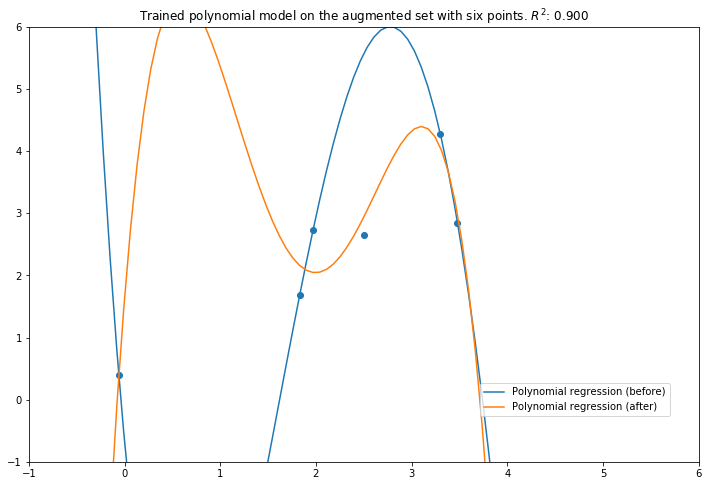

In [22]:
intro.bv_chart_poly_new();

Here we can clearly see how the linear model has a lower variance than the polynomial one: the best-fit line almost does not move, but the bet-fit polynomial changes drastically.
To summarize:

* The linear regression model has higher bias, but lower variance;
* The polynomial regression model (of degree 4) has lower bias, but higher variance.

A model which exhibits high variance and low bias is called an **overfitted** model.
In this case, the model is likely too complex.
For example, in the case of polynomial vs. linear regression, the polynomial model has many more coefficients.
A complex model may fit better over the training set, but is not able to generalise well to the test data.

On the other hand, a model which exhibits low variance and high bias is called an **underfitted** model.
This model is likely not complex enough.
While this helps the model at generalising, it introduces a high bias so that there is a systematic deviation between the predicted data and the true one.

From a practical point of view, it is "easy" to complicate and underfitted estimator: we can always come up with new parametres.
For example, if a linear regression model is underfitted, we can add quadratic terms.
On the other hand, it is harder to make an overfitted model generalise better.
That is why there is a vast literature dedicated to solving this problem.
On of the most common techniques is called **regularisation** and consists of simplifying the vector of parametres $\Lambda$, for example by pushing some of its entry to be zero (and, thus, disappear), or bounding its norm.
We will cover the topic of regularisation in a few classes.